## Elementarströmungen 2

Wir haben bereits die Translationsströmung, Quellen- und Senkenströmung sowie deren Überlagerung kennengelernt. Im zweiten Teil der Elementarströmungen kommen jetzt noch zwei wichtige hinzu: die Dipolströmung und der Potentialwirbel.

### Dipolströmung

Die Dipolströmung ist ein Sonderfall der Überlagerung einer Quellen- und einer Senkenströmung mit gleicher Stärke $Q$, mit verschwindendem Abstand $\Delta x$. Dabei wird beim Grenzübergang $\Delta x \rightarrow 0$ das Produkt $M=Q\cdot\Delta x$, das sog. **Dipolmoment**, konstant gehalten, indem $Q$ umgekehrt proportional erhöht wird. Die resultierende Potentialfunktion wird dann:

$$\phi = \frac{M}{2\pi}\cdot \lim_{\Delta x\rightarrow 0} \left( \frac{\ln\sqrt{(x+\Delta x)^2+y^2}-\ln\sqrt{x^2+y^2} } {\Delta x} \right)$$

$$\phi = \frac{M}{2\pi}\cdot \frac{x}{x^2+y^2}$$

Mit der gleichen Vorgehensweise erhält man die Stromfunktion der Dipolströmung:

$$\psi = \frac{M}{2\pi}\cdot\lim_{\Delta x\rightarrow 0}\left(\frac{\text{arctan} \frac{y}{x} - \text{arctan} \frac{y}{x+\Delta x}}{\Delta x}\right)$$

$$\psi = -\frac{M}{2\pi}\cdot \frac{y}{x^2+y^2}$$

Durch Ableitung der Potential- oder der Stromfunktion erhält man schließlich die Geschwindigkeitskomponenten der Dipolströmung:

$$u = -\frac{M}{2\pi} \cdot \frac{x^2-y^2}{(x^2+y^2)^2}$$
$$v = -\frac{M}{2\pi} \cdot \frac{2xy}{(x^2+y^2)^2}$$

Für die Implementierung in Python importieren wir wieder die benötigten Bibliotheken und definieren die benötigten Variablen:

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

nx = 400                              # Anzahl der Punkte in x-Richtung
ny = 200                              # Anzahl der Punkte in y-Richtung
x = np.linspace(-5, 15, nx)           # 1D-Array mit x-Koordinaten
y = np.linspace(-5,  5, ny)           # 1D-Array mit y-Koordinaten

X, Y = np.meshgrid(x, y)              # erzeugt das Gitter mit nx * ny Punkten

Die oben gezeigten Gleichungen für die Geschwindigkeitskomponenten sowie die Potential- und Stromfunktionen implementieren wir als Funktionen:

In [4]:
def dipolx_v(x, y, xs, ys, M):        # der Geschwindigkeitsvek. der Quellenstr.
    s = -M/(2*math.pi) / ((x-xs)**2+(y-ys)**2)**2
    return s*((x-xs)**2-(y-ys)**2), s*2*(x-xs)*(y-ys)

def dipolx_psi(x, y, xs, ys, M):      # die Stromfunktion der Quellenströmung
    return -M/(2*math.pi) * (y-ys) / ((x-xs)**2+(y-ys)**2)
        
def dipolx_phi(x, y, xs, ys, M):      # die Potentialfunktion der Quellenströmung
    return M/(2*math.pi) * (x-xs) / ((x-xs)**2+(y-ys)**2)

Damit ist alles bereit, um die Strom- und Potentiallinien der Dipolströmung zu berechnen und diese zu zeichnen:

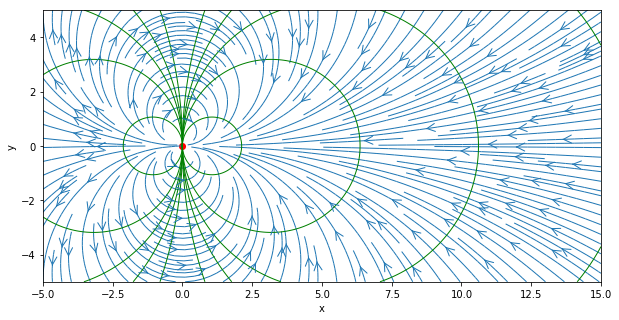

In [5]:
M = 20.0                                      # Dipolmoment in m^3/s

u_dipol, v_dipol = dipolx_v(X, Y, 0, 0, M)    # Dipolströmung bei (0,0)
psi_dipol = dipolx_psi(X, Y, 0, 0, M)
phi_dipol = dipolx_phi(X, Y, 0, 0, M)

plt.figure(figsize=(10, 5))
plt.xlabel('x')
plt.ylabel('y')
plt.streamplot(X, Y, u_dipol, v_dipol, 
               density=2, linewidth=1, arrowsize=2, arrowstyle='->')
plt.contour(X, Y, phi_dipol, 
            [-1.5, -0.5, -0.3, -0.2, -0.1, 0.1, 0.2, 0.3, 0.5, 1.5],
            colors='green', linewidths=1, linestyles='solid')
#plt.contour(X, Y, psi_dipol, 
#           [-1.5, -0.2, -0.05, -0.01, 0.01, 0.05, 0.2, 1.5],
#            colors='#407eb4', linewidths=1, linestyles='solid')
plt.scatter(0, 0, color='red', s=50, marker='o', linewidth=0);

Die Dipolströmung für sich alleine betrachtet ist nicht besonders sinnvoll. Wenn wir Sie jedoch mit einer Translationsströmung überlagern, erhalten wir die Umströmung eines Zylinders.

Wir müssen hierzu nur die bereits zuvor definierten Funktionen für die Translationsströmung übernehmen:

In [6]:
def trans_v(x, y, u1, v1):       # der Geschwindigkeitsvek. der Translationsstr.
    return np.full_like(x, u1), np.full_like(y, v1)

def trans_psi(x, y, u1, v1):     # die Stromfunktion der Translationsströmung
    return -v1*x+u1*y 
        
def trans_phi(x, y, u1, v1):     # die Potentialfunktion der Translationsströmung
    return u1*x+v1*y

und diese mit der Dipolströmung überlagern:

In [7]:
u1 = 0.3

u_trans, v_trans = trans_v(X, Y, u1, 0)    # Translationsströmung
u_gesamt = u_dipol + u_trans               # lineare Überlagerung
v_gesamt = v_dipol + v_trans

psi_trans = trans_psi(X, Y, u1, 0.0)
psi_gesamt = psi_dipol + psi_trans

phi_trans = trans_phi(X, Y, u1, 0.0)
phi_gesamt = phi_dipol + phi_trans

und schließlich grafisch darstellen:

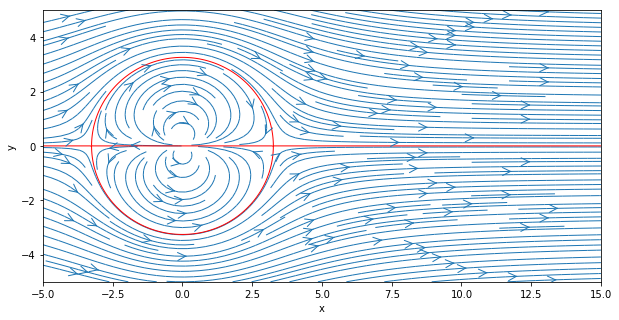

In [8]:
# Neuen Plot einrichten
plt.figure(figsize=(10, 5))
plt.xlabel('x')
plt.ylabel('y')

# Stromlinien mit Matplotlib-Funktion darstellen
plt.streamplot(X, Y, u_gesamt, v_gesamt, 
                  density=2, linewidth=1, arrowsize=2, arrowstyle='->')

# Staustromlinie in rot eintragen
plt.contour(X, Y, psi_gesamt, levels=[0],
            colors='red', linewidths=1, linestyles='solid');

### Potentialwirbel (drehungsfreier Wirbel)

Unter einem Potentialwirbel versteht man eine Strömung, auf der die Fluidelemente auf kreisförmigen Bahnen um einen zentralen Punkt umlaufen und sich dabei nicht um die eigene Achse drehen. Man spricht dann von einem drehungsfreien Wirbel.

![](potential_vs_starrkoerperwirbel.pdf)

Beim Potentialwirbel ist die Radialkomponente der Geschwindigkeit gleich Null:

$$u_r = 0$$

Die Tangentialkomponente erhalten wir durch die Erfüllung der Drehungsfreiheit

$$\text{rot}\overrightarrow{v} = 
\begin{pmatrix}
    \frac{\partial w}{\partial y}-\frac{\partial v}{\partial z} \\
    \frac{\partial u}{\partial z}-\frac{\partial w}{\partial x} \\
    \frac{\partial v}{\partial x}-\frac{\partial u}{\partial y}
\end{pmatrix}_{x,y,z}
=
\begin{pmatrix}
    \frac{1}{r}\frac{\partial u_z}{\partial \varphi}-\frac{\partial u_\varphi}{\partial z} \\
    \frac{\partial u_r}{\partial z}-\frac{\partial u_z}{\partial r} \\
    \frac{1}{r}\frac{\partial (ru_\varphi)}{\partial r}-\frac{1}{r}\frac{\partial u_r}{\partial \varphi}
\end{pmatrix}_{r,\varphi,z} = 0,$$

die hier auch in Zylinderkoordinaten gegeben ist, da die Herleitung der tangentialien Geschwindigkeitskomponente des Potentialwirbels in Zylinderkoordinaten einfacher ist. Im Zweidimensionalen sind die $z$-Komponente der Geschwindigkeit und alle Ableitungen nach $z$ Null und es muss nur die folgende Gleichung erfüllt werden:

$$\frac{\partial (ru_\varphi)}{\partial r}-\frac{\partial u_r}{\partial \varphi} = 0$$

Da der Potentialwirbel axialsymmetrisch ist, ändert sich die Geschwindigkeit in Umfangsrichtung nicht, so dass $\frac{\partial u_r}{\partial \varphi} = 0$ ist und sich damit die Forderung der Drehungsfreiheit auf

$$\frac{\partial (ru_\varphi)}{\partial r} = 0$$

reduziert. Die Gleichung ist erfüllt, wenn $ru_\varphi = const$ ist. Wobei es üblich ist, die Konstante durch die [Zirkulation](https://de.wikipedia.org/wiki/Zirkulation_%28Feldtheorie%29) $\Gamma$ auszudrücken und bei positiver Zirkulation eine Drehrichtung des Wirbels im Uhrzeigersinn zu definieren. Damit sind die Geschwindigkeitskomponenten des Potentialwirbels bekannt:

$$u_\varphi = -\frac{\Gamma}{2\pi r}, \qquad u_r = 0$$

bzw. in kartesischen Koordinaten:

$$u_x = \frac{\Gamma}{2\pi}\frac{y}{x^2+y^2}, \qquad u_y = -\frac{\Gamma}{2\pi}\frac{x}{x^2+y^2}$$

Durch Integration der Geschwindigkeitskomponenten finden wir wieder die Potential- und Stromfunktionen (vgl. Herleitung der Quellenströmung):

$$\phi = -\frac{\Gamma}{2\pi}\text{arctan}\left(\frac{y}{x}\right), \qquad \psi = \frac{\Gamma}{2\pi} \text{ln}\sqrt{x^2+y^2}$$



Als nächstes sollen die Strom- und Potentiallinien des Potentialwirbels dargestellt werden. Dazu definieren wir wieder entsprechende Python-Funktionen:

In [9]:
def vortex_v(x, y, x1, y1, Gamma):   # Geschwindigkeitsvek. des Potentialwirbels
    s = Gamma/(2*math.pi*((x-x1)**2+(y-y1)**2))
    return s*(y-y1), -s*(x-x1)

def vortex_psi(x, y, x1, y1, Gamma): # Stromfunktion des Potentialwirbels
    s = -Gamma/(2*math.pi)
    return -s*np.log((x-x1)**2+(y-y1)**2)
        
def vortex_phi(x, y, x1, y1, Gamma): # Potentialfunktion des Potentialwirbels
    s = -Gamma/(2*math.pi)
    return np.arctan2((y-y1),(x-x1))

Und plotten alles wieder mit der Matplotlib:

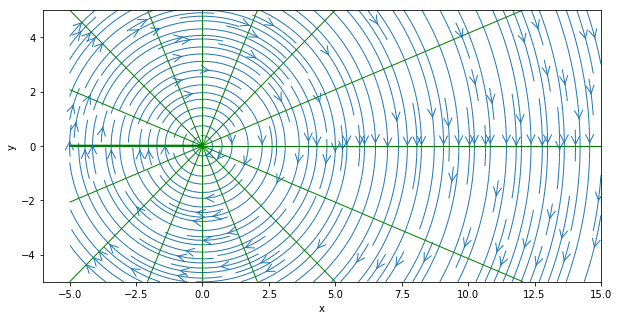

In [10]:
Gamma = 2

u_vortex, v_vortex = vortex_v(X, Y, 0, 0, Gamma)
phi_vortex = vortex_phi(X, Y, 0, 0, Gamma)

# Neuen Plot einrichten
plt.figure(figsize=(10, 5))
plt.xlabel('x')
plt.ylabel('y')

# Stromlinien mit Matplotlib-Funktion darstellen
plt.streamplot(X, Y, u_vortex, v_vortex, 
                  density=2, linewidth=1, arrowsize=2, arrowstyle='->')

# Potentiallinien in grün einzeichnen
plt.contour(X, Y, phi_vortex,
            [-math.pi*7/8, -math.pi*3/4, -math.pi*5/8, -math.pi/2, 
             -math.pi*3/8, -math.pi/4, -math.pi/8, 
             0, math.pi/8, math.pi/4, math.pi*3/8, math.pi/2, 
             math.pi*5/8, math.pi*3/4, math.pi*7/8],
            colors='green', linewidths=1, linestyles='solid');

Der Potentialwirbel ist bis auf sein Zentrum drehungsfrei. D.h. die Zirkulation

$$\Gamma = \oint_C {\overrightarrow{v}(\overrightarrow{r}) \text{d} \overrightarrow{r}}$$

entlang einer beliebigen Kurve $C$ in der Umgebung des Wirbels, die das Zentrum nicht mit einschließt gerade Null ist. Nur wenn das Zentrum innerhalb der geschlossenen Kurve liegt, ist die Zirkulation $\Gamma$ ungleich Null und entspricht dem vorgegebenen Wert.

### Übersicht Elementarströmungen

Die folgende Tabelle gibt eine Übersicht, über die zuvor hergeleiteten Elementarströmungen. Zusätzlich ist die Staupunktströmung enthalten, auf die wir im Rahmen der Vorlesung nicht näher eingehen. Die Übersicht enthält die Gleichungen der Geschwindigkeitsvektoren sowie der Potential- und Stromfunktionen in kartesischen sowie Polarkoordinaten.

![](Formelsammlung_Potentialtheorie.pdf)

[Hier auch zum Runterladen als PDF](Formelsammlung_Potentialtheorie.pdf)

Im nächsten Kapitel werden wir die Elementarströmungen so überlagern, dass wir auch den Auftrieb von umströmten Körpern berechnen können.


[Hier](2_4-Potentialtheorie_Auftrieb.ipynb) geht's weiter oder [hier](index.ipynb) zurück zur Übersicht.


---
###### Copyright (c) 2017, Florian Theobald und Matthias Stripf

Der folgende Python-Code darf ignoriert werden. Er dient nur dazu, die richtige Formatvorlage für die Jupyter-Notebooks zu laden.

In [11]:
from IPython.core.display import HTML
def css_styling():
    styles = open('TFDStyle.css', 'r').read()
    return HTML(styles)
css_styling()